In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma,t
from numpy import random, linalg
from scipy.stats import multivariate_normal
from scipy.stats import truncnorm

In [3]:

#Gibbs parameters
samples=15000
burn_in=1000

#s1,s2 -Assembler
s1_list=[]
s2_list=[]

#mean S assembler
mean_s=np.array([[28],[28]])
mean_s1=[]
mean_s2=[]
mean_s1.append(float(mean_s[0]))
mean_s2.append(float(mean_s[1]))

#dev S assembler
dev_s=np.array([[8.3,0],[0,8.3]])
dev_s1=[]
dev_s2=[]
dev_s1.append(float(dev_s[0,0]))
dev_s2.append(float(dev_s[0,1]))

#def A
A=np.array([[1,-1]])

# #Initial values of s1 and s2
s1=random.normal(loc=mean_s1,scale=np.sqrt(dev_s1),size=1)
s2=random.normal(loc=mean_s2,scale=np.sqrt(dev_s2),size=1)

s1_list.append(s1)
s2_list.append(s2)
a=0
b=np.inf


/tmp/ipykernel_36496/4097356990.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_s1.append(float(mean_s[0]))
/tmp/ipykernel_36496/4097356990.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_s2.append(float(mean_s[1]))


In [4]:
#Gibbs sampling
for i in range(samples-1):

    #p(t>0|s1,s2)
    mean_t=s1-s2
    dev_t=dev_s[0,0]+dev_s[1,1]
    t=truncnorm.rvs((a-mean_t)/np.sqrt(dev_t),(b-mean_t)/np.sqrt(dev_t),loc=mean_t,scale=np.sqrt(dev_t))
    
    # #p(s1,s2|t>0)
    dev_s_old=dev_s
    dev_s=np.linalg.inv(np.linalg.inv(dev_s)+np.transpose(A)*1/dev_t*A)
    mean_s=dev_s@(np.linalg.inv(dev_s_old)@mean_s+np.transpose(A)*1/dev_t*t)
    s1=random.normal(loc=mean_s[0],scale=np.sqrt(dev_s[0][0]),size=1)
    s2=random.normal(loc=mean_s[1],scale=np.sqrt(dev_s[1][1]),size=1)

    mean_s1.append(float(mean_s[0]))
    mean_s2.append(float(mean_s[1]))
    dev_s1.append(float(dev_s[0][0]))
    dev_s1.append(float(dev_s[1][1]))
    s1_list.append(float(s1))
    s2_list.append(float(s2))






print(len(s1_list))
print(len(s2_list))   



/tmp/ipykernel_36496/2623923805.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_s1.append(float(mean_s[0]))
/tmp/ipykernel_36496/2623923805.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_s2.append(float(mean_s[1]))
/tmp/ipykernel_36496/2623923805.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s1_list.append(float(s1))
/tmp/ipykernel_36496/2623923805.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated,

15000
15000


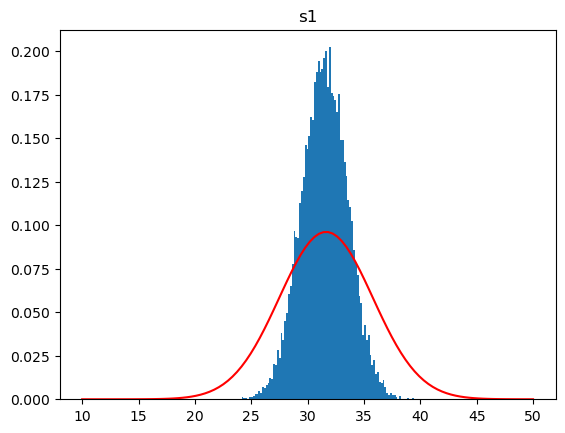

In [5]:
import scipy.stats as stats
# plt.figure(1)
# # plt.plot(range(samples),mean_s1, label='mean of s1')
# plt.plot(range(3000,samples),mean_s1[3000:], label='mean of s1')
# plt.figure(2)
# plt.plot(range(3000,samples),mean_s2[3000:], label='mean of s2')
# # plt.plot(range(samples),mean_s2, label='mean of s2')
# plt.legend()
# plt.show()
# plt.figure(3)
# plt.plot(dev_s1,label='variance of s1')
# plt.plot(dev_s2,label='variance of s2')
# plt.legend()
# plt.show()
# plt.figure(4)

# Create pdf
xv = np.linspace(10, 50, 100)
plt.hist(s1_list[100:],bins=100,density=True)
plt.plot(xv, stats.norm.pdf(xv, mean_s1[-1], dev_s1[-1]), 'r')
plt.title('s1')
plt.show()

